In [1]:
import cv2
import time
from ultralytics import YOLO

model = YOLO("/Users/akshathr/Downloads/best (9).pt")

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

accuracies = []
predictions = []
timestamps = []

last_update_time = time.time()
update_interval = 1  

class_colors = {
    0: (0, 255, 0),   
    1: (255, 0, 0), 
}

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture image.")
        break

    results = model(frame)
    
    current_accuracies = []
    current_predictions = []
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            cls = box.cls[0].item()
            label = f"{model.names[int(cls)]} {conf:.2f}"
            
            color = class_colors.get(int(cls), (0, 255, 0)) 
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 2)
            
            current_accuracies.append(conf)
            current_predictions.append(model.names[int(cls)])

    if time.time() - last_update_time >= update_interval:
        current_time = time.time()
        accuracies.extend(current_accuracies)
        predictions.extend(current_predictions)
        timestamps.extend([current_time] * len(current_accuracies))
        last_update_time = current_time
    
    cv2.imshow('YOLOv8 Live Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 Focused, 1 Unfocused, 240.0ms
Speed: 5.5ms preprocess, 240.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Focused, 246.9ms
Speed: 9.0ms preprocess, 246.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Focused, 153.5ms
Speed: 2.5ms preprocess, 153.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Focuseds, 122.9ms
Speed: 2.2ms preprocess, 122.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Focused, 108.6ms
Speed: 2.0ms preprocess, 108.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Focused, 113.3ms
Speed: 2.2ms preprocess, 113.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Focused, 114.2ms
Speed: 2.3ms preprocess, 114.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Focused, 108.6ms
Speed: 2.5ms preprocess, 108.6ms inference, 0.4ms po

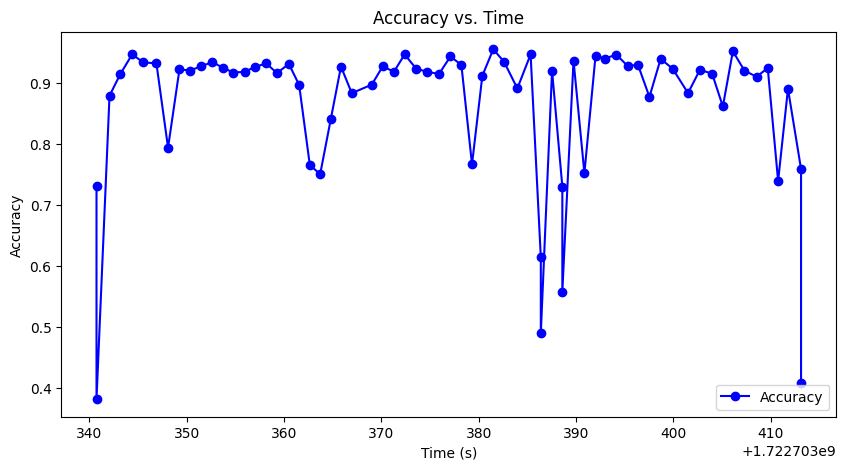

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(timestamps, accuracies, 'bo-', label='Accuracy')
plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Time')
plt.legend()
plt.show()


In [3]:
current_pred=predictions[0]
count=0
longest_count_arr=[]
updated_longest_count=[]
for i in range(len(accuracies)):
    if(current_pred==predictions[i]):
        count+=1
    else:
        longest_count_arr.append((current_pred,count))
        count=1
        current_pred=predictions[i]

for i in longest_count_arr:
    if(i[1]==1):
        continue
    else:
        if(i[0]=="Unfocused"):
            updated_longest_count.append(i[1]*-1)
        else:
            updated_longest_count.append(i[1])

In [4]:
updated_longest_count

[6, 11, -4, 16, 2, 16, 2]

/var/folders/g3/_bfwzcrs1c1fgz73qmkl8gkr0000gp/T/ipykernel_34071/3317997083.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


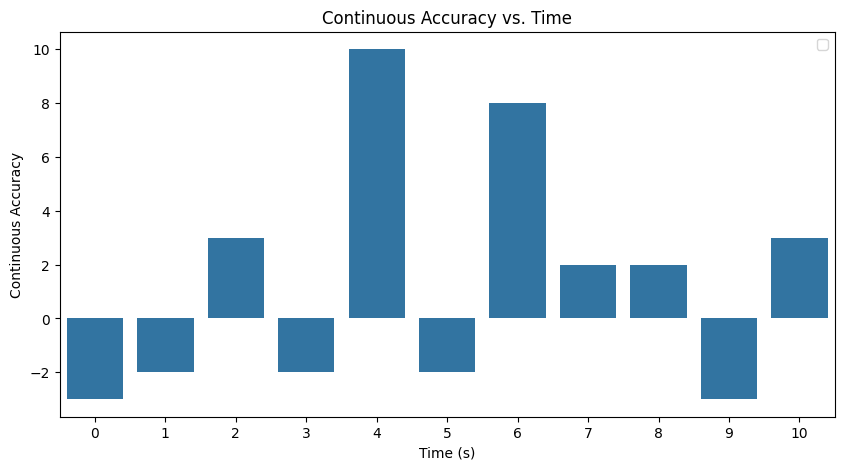

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(data=updated_longest_count)
plt.xlabel('Time (s)')
plt.ylabel('Continuous Accuracy')
plt.title('Continuous Accuracy vs. Time')
plt.legend()
plt.show()
